In [153]:
from tensorflow.keras.applications.vgg16 import VGG16
import pandas as pd 
import os
import cv2
import numpy as np
from tensorflow.keras import Sequential
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import tensorflow as tf

In [62]:
!pip install tensorflow_hub

In [11]:
directory = 'E:\\VOCtrainval_06-Nov-2007\\VOCdevkit\\VOC2007\\ImageSets\Main'
tab = []
with open(os.path.join(directory,'aeroplane_train.txt'),'r') as plik:
    for line in plik:
        read = line.split()
        tab.append(read[0])
        
        
        
    
    
    

In [37]:
directory = 'E:\\VOCtrainval_06-Nov-2007\\VOCdevkit\\VOC2007\\ImageSets\Main'
tab = []
with open(os.path.join(directory,'aeroplane_val.txt'),'r') as plik:
    for line in plik:
        read = line.split()
        tab.append(read[0])
        
data_val = pd.DataFrame(tab)

In [15]:
data_train = pd.DataFrame(tab)

In [35]:
string = 'val'
column = []
for direct in os.listdir(directory):
    if string not in direct and direct != 'train.txt' :
        
        
        with open(os.path.join(directory,direct),'r') as plik:
              for line in plik:
                read = line.split()
                column.append(read[1])
                
        data_train[direct] = column
        column = []
          
        
        

In [36]:
# number = 0
# for direct in os.listdir(directory):
#     if string not in direct:
#         with open(os.path.join(directory,direct),'r') as plik:
            
            
#               for line in plik:
#                     read = line.split()
#                     if len(read) < 2:
#                         print(direct,read[0])
                        
data_train                    
        

,0,aeroplane_train.txt,bicycle_train.txt,bird_train.txt,boat_train.txt,bottle_train.txt,bus_train.txt,car_train.txt,cat_train.txt,chair_train.txt,...,diningtable_train.txt,dog_train.txt,horse_train.txt,motorbike_train.txt,person_train.txt,pottedplant_train.txt,sheep_train.txt,sofa_train.txt,train_train.txt,tvmonitor_train.txt
0,000012,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,000017,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,-1,-1,-1,-1
2,000023,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
3,000026,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,000032,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,009944,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,1,-1,-1,-1,-1,-1
2497,009945,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
2498,009949,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,-1,-1,1,-1,-1
2499,009959,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [38]:
string = 'train'
column = []
for direct in os.listdir(directory):
    if string not in direct and direct != 'val.txt' :
        
        
        with open(os.path.join(directory,direct),'r') as plik:
              for line in plik:
                read = line.split()
                column.append(read[1])
                
        data_val[direct] = column
        column = []
          

In [54]:
# os.path.join('E:\\VOCtrainval_06-Nov-2007\\VOCdevkit\\VOC2007\\JPEGImages',data_train[0][0],'.jpg')
string = data[0][0] + '.jpg'
string

'000012.jpg'

In [80]:
features_train = []
image_dir = 'E:\\VOCtrainval_06-Nov-2007\\VOCdevkit\\VOC2007\\JPEGImages'
for x in data_train[0]:
    image_jpg = x + '.jpg'
    image_path = os.path.join(image_dir,image_jpg)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    image = np.array(image, dtype = np.float32)
    features_train.append(image)
    

In [112]:
features_train = np.array(features_train)
features_train[0] = features_train[0] / 255

In [114]:
features_train.shape


(2501, 224, 224, 3)

In [149]:
labels_train = np.array(data_train.drop([0],axis = 1))

In [150]:
labels_train.shape

(2501, 20)

In [151]:

    
labels_train = np.where(labels_train == '-1',0,labels_train)

In [152]:
labels_train = labels_train.astype(np.float64)

In [ ]:
# feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# image_size = (224,224)
# classifier = tf.keras.Sequential([
#     hub.KerasLayer(feature_extractor_model, input_shape=IMAGE_SHAPE+(3,),trainable = False )
# ])
# model = Sequential([
#     classifier,
#     tf.keras.layers.Dense()
    
# ])


In [154]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

In [155]:
feature_extractor_layer.trainable = False


In [157]:
model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dense(1024, activation='relu', name='hidden_layer'),
    tf.keras.layers.Dense(20, activation='sigmoid', name='output')
])


In [159]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_8 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 hidden_layer (Dense)        (None, 1024)              1311744   
                                                                 
 output (Dense)              (None, 20)                20500     
                                                                 
Total params: 3,590,228
Trainable params: 1,332,244
Non-trainable params: 2,257,984
_________________________________________________________________


In [161]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [162]:
model.fit(x= features_train,y=labels_train,epochs = 10)

Epoch 1/10
79/79 [==============================] - 128s 2s/step - loss: 0.2392 - accuracy: 0.2055
Epoch 2/10
79/79 [==============================] - 117s 1s/step - loss: 0.1936 - accuracy: 0.2635
Epoch 3/10
79/79 [==============================] - 117s 1s/step - loss: 0.1797 - accuracy: 0.3023
Epoch 4/10
79/79 [==============================] - 118s 1s/step - loss: 0.1681 - accuracy: 0.3423
Epoch 5/10
79/79 [==============================] - 118s 1s/step - loss: 0.1597 - accuracy: 0.3758
Epoch 6/10
79/79 [==============================] - 118s 1s/step - loss: 0.1514 - accuracy: 0.4126
Epoch 7/10
79/79 [==============================] - 117s 1s/step - loss: 0.1474 - accuracy: 0.4242
Epoch 8/10
79/79 [==============================] - 117s 1s/step - loss: 0.1378 - accuracy: 0.4534
Epoch 9/10
79/79 [==============================] - 117s 1s/step - loss: 0.1342 - accuracy: 0.4678
Epoch 10/10
79/79 [==============================] - 117s 1s/step - loss: 0.1254 - accuracy: 0.5054


In [225]:
x = features_train[1321]/255

In [226]:
z = model.predict(x[np.newaxis,...])

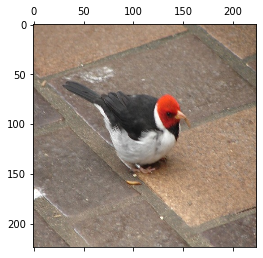

In [227]:
plt.matshow(x)

In [228]:
np.argmax(z)

0

In [229]:
labels_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])